In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt         
import seaborn as sns
import os
import sys
pd.set_option('display.max_columns', None)

In [15]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Aditya-pc\Documents\Python Scripts\Kaggle_Housing_Price_Prediction\train.csv')

In [3]:
df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Checking missing values
df.columns[df.isna().any()]

# out of 81 columns, 19 columns have missing values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
miss = df.isna().sum()/len(df)
miss = miss[miss>0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrArea      0.005479
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtQual        0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageType      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
MasVnrType      0.597260
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [8]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index



In [9]:
miss.head(3)

,count,Name
Name,,
Electrical,0.000685,Electrical
MasVnrArea,0.005479,MasVnrArea
BsmtCond,0.025342,BsmtCond


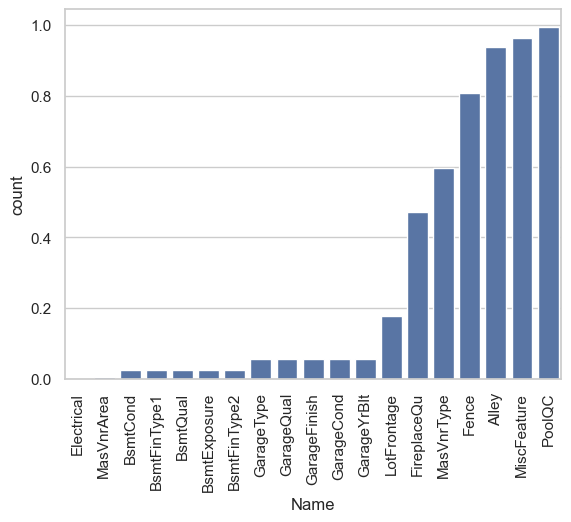

In [10]:
#plotting the missing values count
sns.set(style='whitegrid', color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

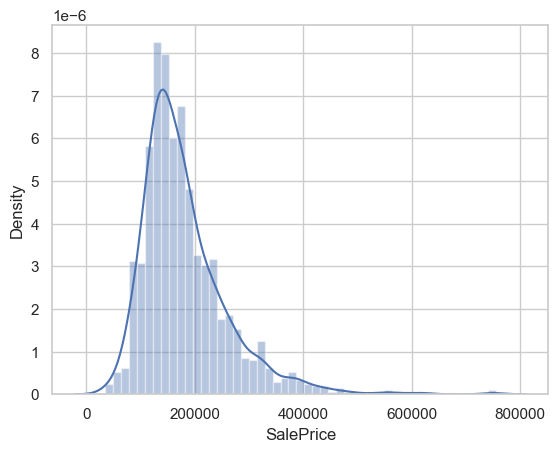

In [16]:
sns.distplot(df['SalePrice'])

In [12]:
df['SalePrice'].skew()

np.float64(1.8828757597682129)

In [13]:
# the skewness >1, so the target variable is right skewed
# we can apply log transformation to make it normal distribution
target = np.log1p(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

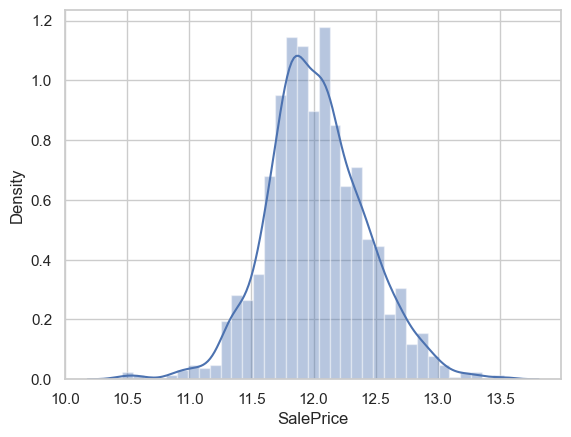

In [18]:
sns.distplot(target)

In [19]:
target.skew()

np.float64(0.12134661989685333)

In [20]:
numeric_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')
print('There are {} numeric and {} categorical columns in the dataset'.format(numeric_cols.shape[1], cat_cols.shape[1]))

There are 38 numeric and 43 categorical columns in the dataset


In [21]:
del(numeric_cols['Id']) 

<Axes: >

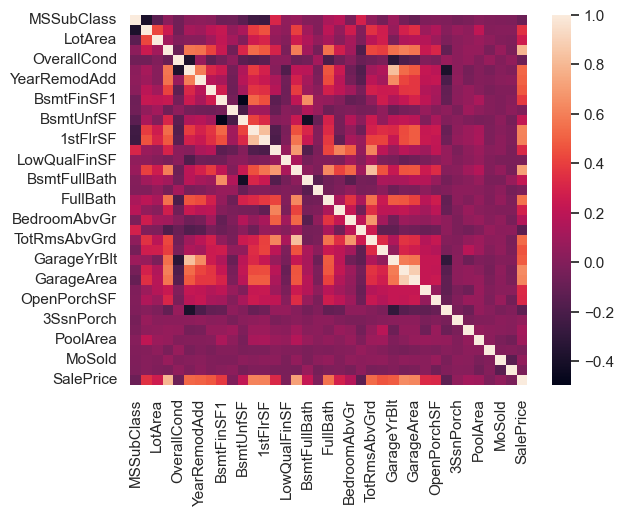

In [22]:
#Now we are going to find the correlation between the numeric columns and the target variable
corr = numeric_cols.corr()  
sns.heatmap(corr)   

In [23]:
print(corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values
print('--------------------------------------------')
print(corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

--------------------------------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [24]:
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [26]:
# The overall quality is measured on a scale of 1 to 10. 
# Hence, we can fairly treat it as an ordinal variable. 
# An ordinal variable has an inherent order. 
# For example, Rank of students in class, data collected on Likert scale, etc. 
# Let's check the median sale price of houses with respect to OverallQual. '
# 'You might be wondering, “Why median ?” We are using median because the target variable is skewed. '
# 'A skewed variable has outliers and median is robust to outliers.

In [27]:
# Let's use Pivot
pivot = pd.pivot_table(data=df, index = 'OverallQual', values = 'SalePrice', aggfunc = np.median)
pivot

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108000.0
5,133000.0
6,160000.0
7,200141.0
8,269750.0
9,345000.0


<Axes: xlabel='OverallQual'>

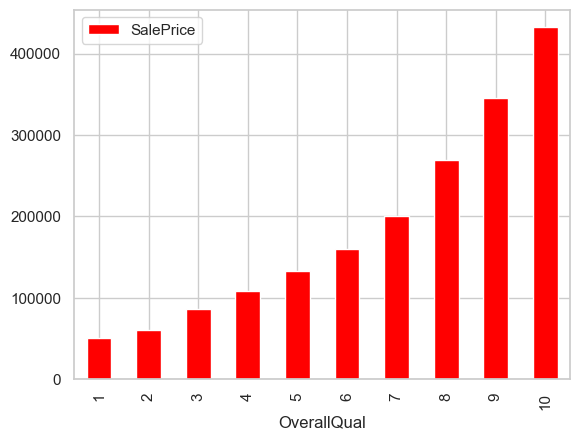

In [29]:
pivot.plot(kind = 'bar', color = 'red')

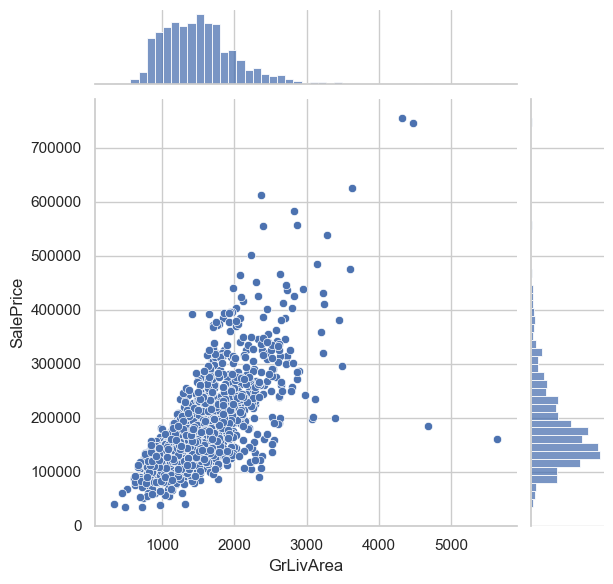

In [30]:
# Now let's see the next variable GrLivArea
# GrLivArea: Above grade (ground) living area square feet
# It is a continuous variable.
# Let's plot it against SalePrice.  
sns.jointplot(x = df['GrLivArea'], y = df['SalePrice'])

In [31]:
df['GarageCars'].unique()   

array([2, 3, 1, 0, 4])

<Axes: xlabel='GarageCars'>

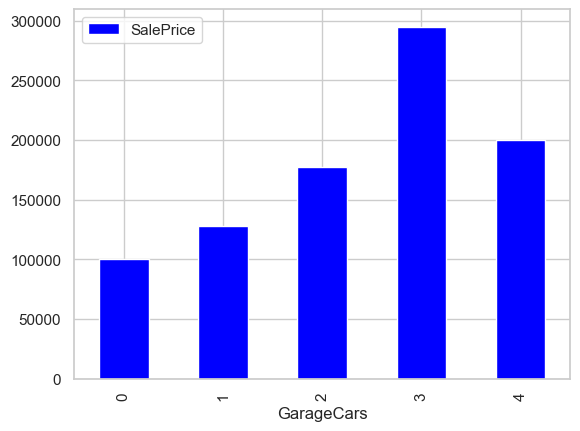

In [32]:
pivot = pd.pivot_table(data = df, index = 'GarageCars', values = 'SalePrice', aggfunc = np.median)
pivot.plot(kind = 'bar', color = 'blue')

In [34]:
df['GarageArea'].nunique()

441

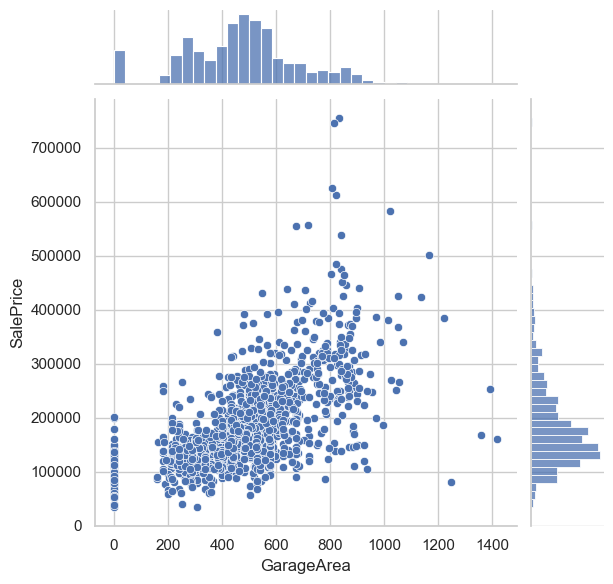

In [35]:
sns.jointplot(x = df['GarageArea'], y = df['SalePrice'])

In [36]:
df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905])

<Axes: xlabel='YearBuilt'>

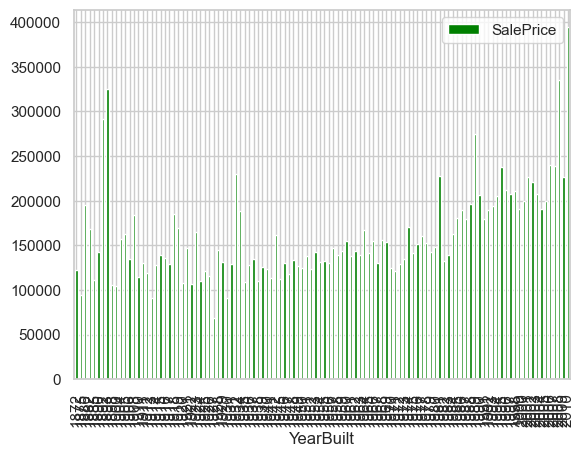

In [42]:
pivot = pd.pivot_table(data=df, index = 'YearBuilt', values = 'SalePrice', aggfunc = np.median)
pivot
pivot.plot(kind = 'bar', color = 'green') 

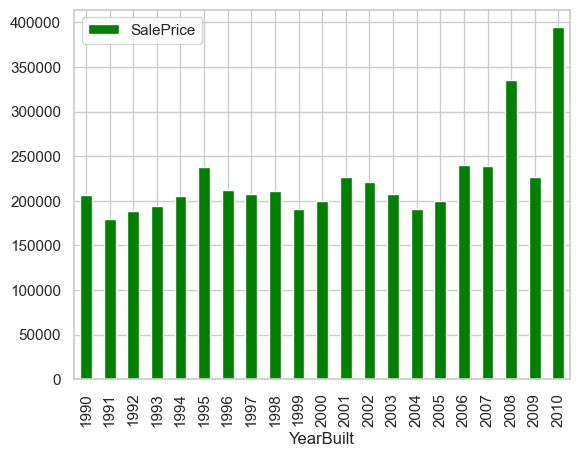

In [48]:
recent_pivot = pivot.loc[pivot.index >= pivot.index.max() - 20]
recent_pivot.plot(kind='bar', color='green')
plt.show()

#### Now analyzing the categorical columns

In [51]:
#The simplest way to understand the categorical variables is by using the describe function.
cat_cols.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


,SalePrice
SaleCondition,
Abnorml,130000.0
AdjLand,104000.0
Alloca,148145.0
Family,140500.0
Normal,160000.0
Partial,244600.0


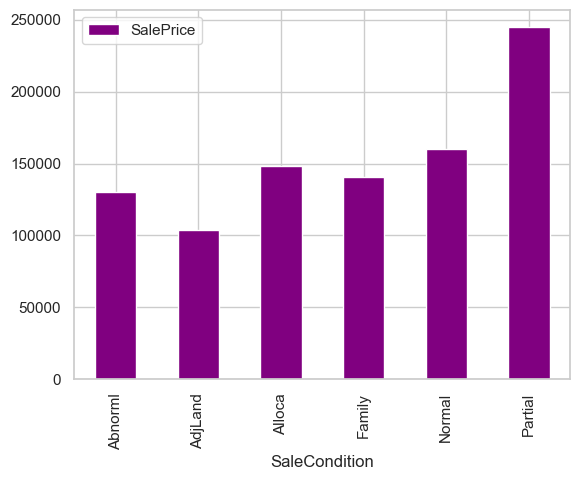

In [54]:
sp_pivot = pd.pivot_table(data=df, index = 'SaleCondition', values = 'SalePrice', aggfunc = np.median)
sp_pivot.plot(kind = 'bar', color = 'purple')
sp_pivot

<!-- ###### like we used correlation to determine the influence of numeric features on SalePrice. Similarly, we'll use the ANOVA test to understand the correlation between categorical variables and SalePrice. ANOVA test is a statistical technique used to determine if there exists a significant difference in the mean of groups. For example, let's say we have two variables A and B. Each of these variables has 3 levels (a1,a2,a3 and b1,b2,b3). If the mean of these levels with respect to the target variable is the same, the ANOVA test will capture this behavior and we can safely remove them.

While using ANOVA, our hypothesis is as follows:

Ho - There exists no significant difference between the groups. Ha - There exists a significant difference between the groups.

Now, we'll define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the feature in predicting sale price. -->

##### like we used correlation to determine the influence of numeric features on SalePrice. Similarly, we'll use the ANOVA test to understand the correlation between categorical variables and SalePrice. ANOVA test is a statistical technique used to determine if there exists a significant difference in the mean of groups. For example, let's say we have two variables A and B. Each of these variables has 3 levels (a1,a2,a3 and b1,b2,b3). If the mean of these levels with respect to the target variable is the same, the ANOVA test will capture this behavior and we can safely remove them.

#### While using ANOVA, our hypothesis is as follows:

##### Ho - There exists no significant difference between the groups. Ha - There exists a significant difference between the groups.

##### Now, we'll define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the feature in predicting sale price.

In [57]:
import scipy.stats as stats

<module 'matplotlib.pyplot' from 'C:\\Users\\Aditya-pc\\AppData\\Roaming\\Python\\Python313\\site-packages\\matplotlib\\pyplot.py'>

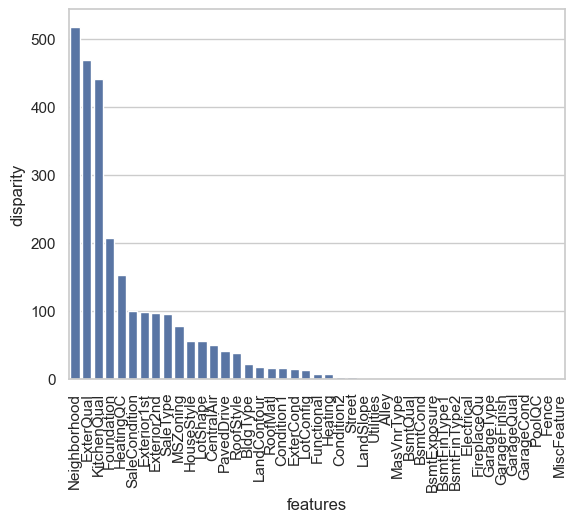

In [58]:
cat = [f for f in df.columns if df.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_cols['SalePrice'] = df.SalePrice.values
k = anova(cat_cols) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

##### Here we see that among all categorical variablesNeighborhoodturned out to be the most important feature followed by ExterQual, KitchenQual, etc. It means that people also consider the goodness of the neighborhood, the quality of the kitchen, the quality of the material used on the exterior walls, etc. Finally, to get a quick glimpse of all variables in a data set, let's plot histograms for all numeric variables to determine if all variables are skewed. For categorical variables, we'll create a boxplot and understand their nature.

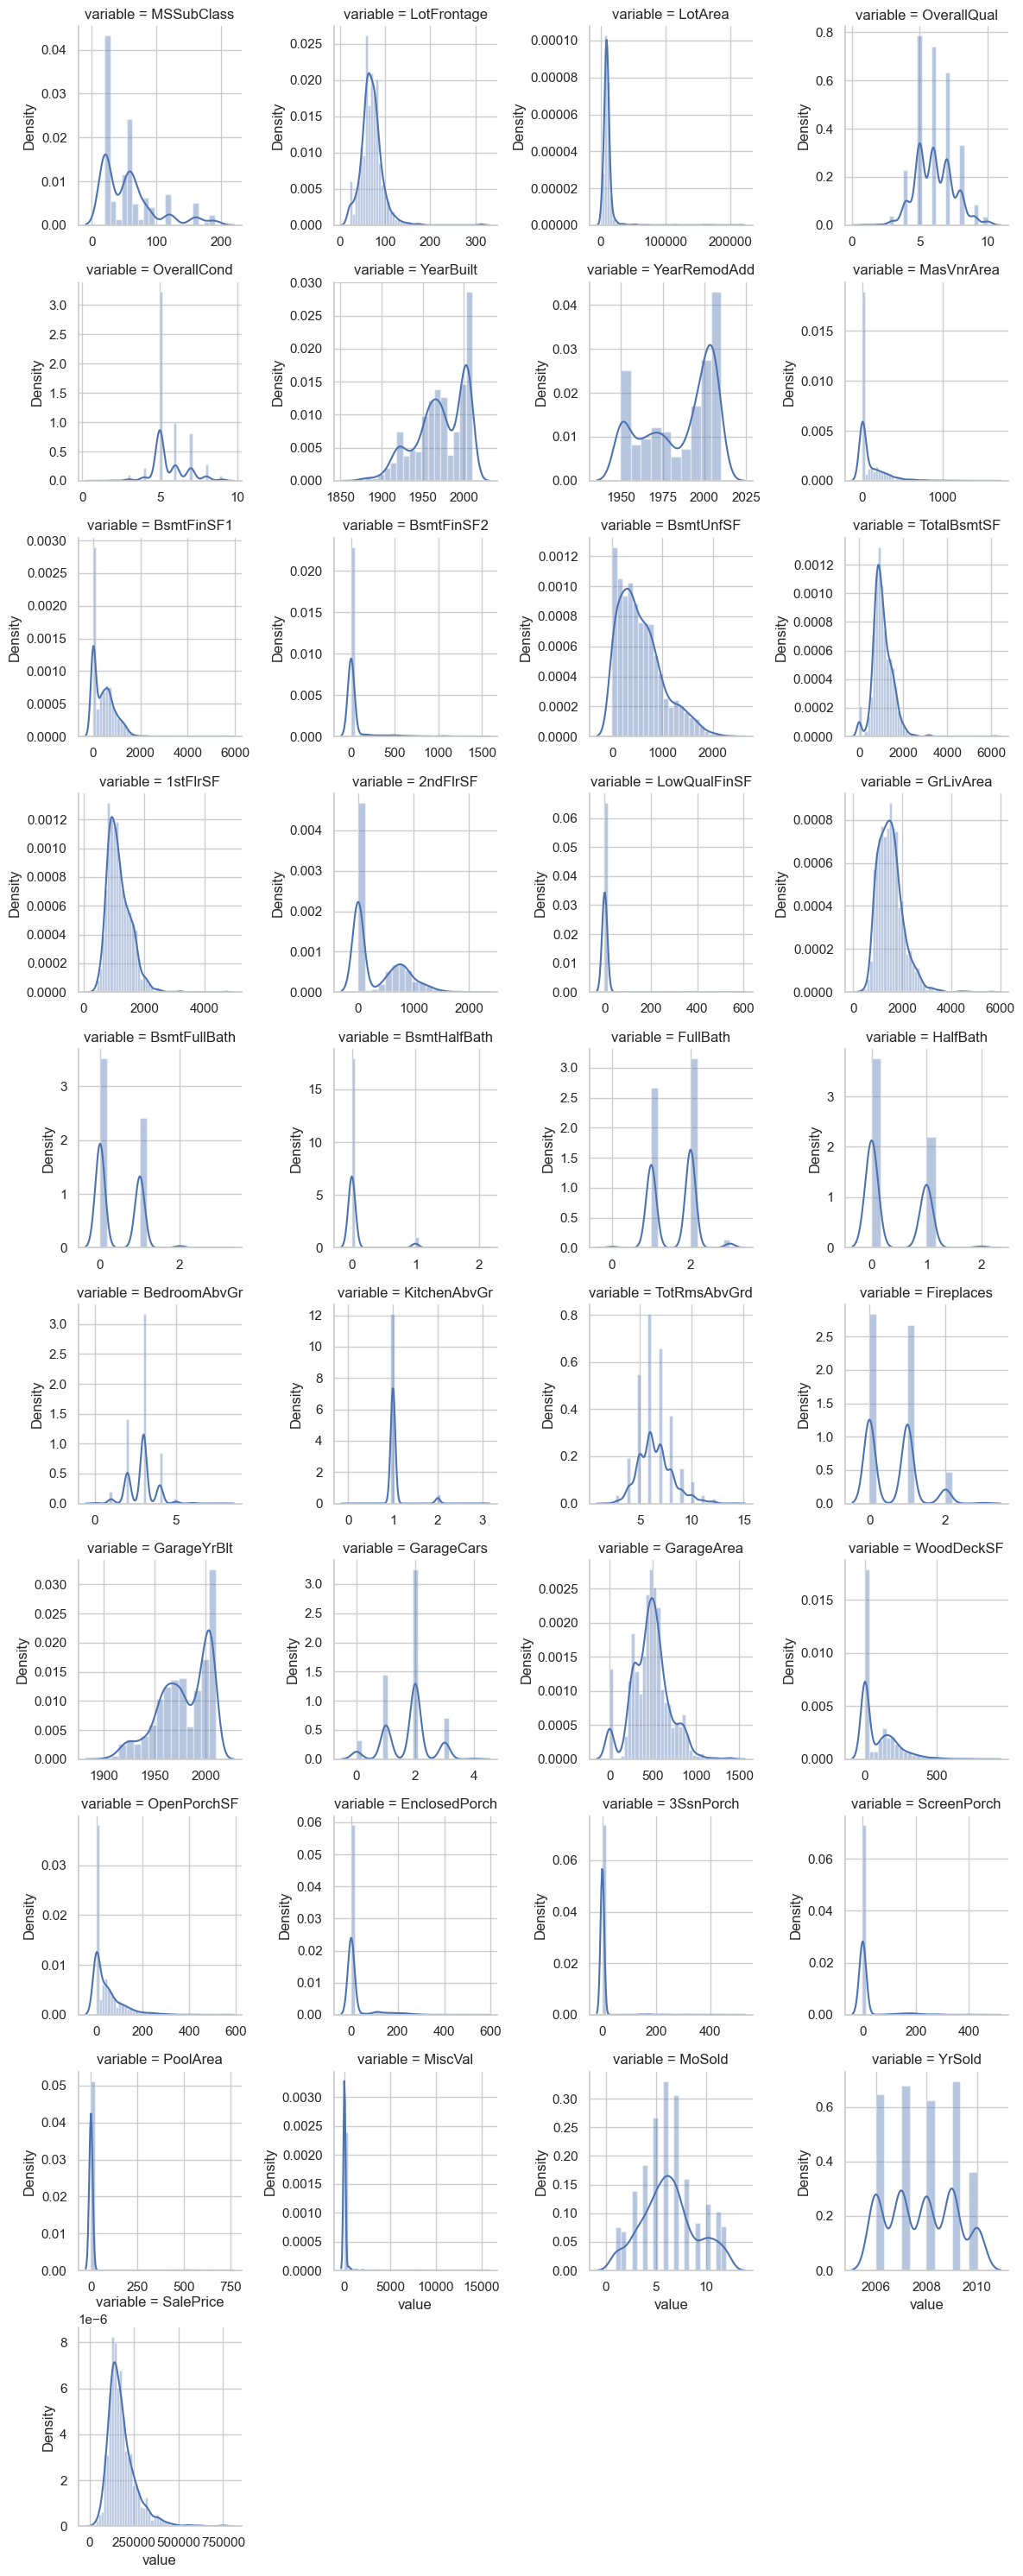

In [59]:
#plotting histograms of all numeric variables
num = [f for f in df.columns if df.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey=False)
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
# As you can see, most of the variables are right skewed. 
# We'll have to transform them in the next stage. 
# Now, let's create boxplots for visualizing categorical variables.

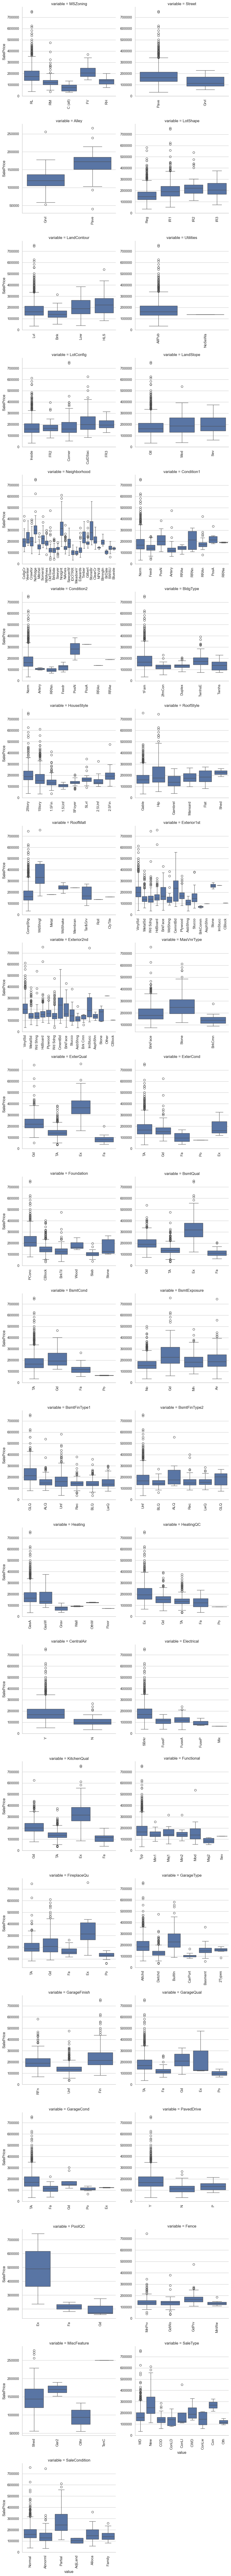

In [63]:
cat = [f for f in df.columns if df.dtypes[f] == 'object']

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)         

p = pd.melt(df, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid(p, col='variable', col_wrap=2, sharex=False, sharey=False, height=5)   
g = g.map(boxplot, 'value', 'SalePrice')
g

In [ ]:
# Here, we can see that most of the variables possess outlier values. 
# It would take us days if we start treating these outlier values one by one. 
# Hence, for now we'll leave them as is and let our algorithm deal with them. 
# As we know, tree-based algorithms are usually robust to outliers.

In [ ]:
# In this stage, we'll deal with outlier values, encode variables, impute missing values, and take every possible 
# initiative which can remove inconsistencies from the data set. 
# We discovered that the variable GrLivArea has outlier values. 
# Precisely, one point crossed the 4000 mark. 

In [ ]:
df.drop(df[df['GrLivArea'] > 4000].index, inplace=True)
df.shape  #removed 4 rows

(1456, 81)

In [65]:
test = pd.read_csv(r'C:\Users\Aditya-pc\Documents\Python Scripts\Kaggle_Housing_Price_Prediction\test.csv')

In [67]:
test.isna().sum().to_frame()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


In [ ]:
test.iloc[666:667]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal


In [83]:
print(test['GarageQual'].mode()[0])
print(test['GarageCond'].mode()[0])
print(test['GarageFinish'].mode()[0] )
print(np.nanmedian(test['GarageYrBlt']))

TA
TA
Unf
1979.0


In [ ]:
# In row 666, in the test data, it was found that 
# information in variables related to 'Garage' (GarageQual, GarageCond, GarageFinish, GarageYrBlt) is missing. 
# Let's impute them using the mode of these respective variables.

In [84]:
test.loc[666, 'GarageQual'] = test['GarageQual'].mode()[0]
test.loc[666, 'GarageCond'] = test['GarageCond'].mode()[0]          
test.loc[666, 'GarageFinish'] = test['GarageFinish'].mode()[0]
test.loc[666, 'GarageYrBlt'] = np.nanmedian(test['GarageYrBlt'])

In [85]:
#In row 1116, in test data, all garage variables are NA except GarageType. Let's mark it NA as well.
test.loc[1116, 'GarageType'] = np.nan

In [ ]:
# Now, we'll encode all the categorical variables. 
# This is necessary because most ML algorithms do not accept categorical values, 
# instead they are expected to be converted to numerical. 
# LabelEncoder function from sklearn is used to encode variables. 

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
le = LabelEncoder()
def factorize(data, var, fill_na=None):
    if fill_na is not None:
        data[var].fillna(fill_na, inplace=True)
    le.fit(data[var])
    data[var] = le.transform(data[var])
    return data

In [ ]:
# This function imputes the blank levels with mode values. The mode values are to be entered manually. 
# Now, let's impute the missing values in LotFrontage variable using the median value of LotFrontage by Neighborhood. 
# Such imputation strategies are built during data exploration. I suggest you spend some more time on data exploration. 
# To do this, we should combine our train and test data so that we can modify both the data sets at once. 
# Also, it'll save our time.

In [89]:
# combining the data
all_data = pd.concat((df, test)).reset_index(drop=True)
all_data.shape


(2915, 81)